# 2022  COSE361 실습 3차시 - 기계학습 1

<과제 제출방법>

1.   제목 끝에 학번과 이름을 추가합니다. 예시) 인공지능_3차시_20XXXXXXXX_이름
2.   주피터노트북의 모든 코드가 오류없이 돌아가도록 실습 활동을 완료합니다.
3.   모든 셀이 출력되어있는 상태로 제출합니다


--------------------------------------------------------------------------------------------------------------------------
본 실습에서는 pandas를 사용하여 데이터를 분석해보고, seaborn을 사용하여 데이터 시각화를 해보고, scikit learn을 활용하여 decision tree를 구현해보도록 하겠습니다. 

본 실습은 아래 그림과 같은 기계학습의 workflow를 따르게됩니다.

![](https://wikidocs.net/images/page/31947/%EB%A8%B8%EC%8B%A0_%EB%9F%AC%EB%8B%9D_%EC%9B%8C%ED%81%AC%ED%94%8C%EB%A1%9C%EC%9A%B0.PNG)

In [38]:
# 필요한 라이브러리들을 import해줍니다
import numpy as np 
import pandas as pd  
#시각화에 사용될 라이브러리
import seaborn as sns   
import matplotlib.pyplot as plt

## 1. Import data 

이번 실습에서는 UCI에서 제공해주는 abalone 데이터셋을 이용하여 실습을 진행하도록 하겠습니다 

* UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/index.php
* abalone dataset: https://archive.ics.uci.edu/ml/datasets/abalone


## Data Set Information:

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Name / Data Type / Measurement Unit / Description
-----------------------------
* Sex / nominal / -- / M, F, and I (infant)

* Length / continuous / mm / Longest shell measurement

* Diameter / continuous / mm / perpendicular to length

* Height / continuous / mm / with meat in shell

* Whole weight / continuous / grams / whole abalone

* Shucked weight / continuous / grams / weight of meat

* Viscera weight / continuous / grams / gut weight (after bleeding)

* Shell weight / continuous / grams / after being dried

* Rings / integer / -- / +1.5 gives the age in years


abalon 데이터셋의 label은 Rings(abalon의 나이)인 것을 알 수 있습니다. 
즉, 우리는 sex ~ sheel weight attributes를 사용하여 abalon의 Rings를 예측하는 것이 본 실습 머신러닝 테스크라 할 수 있겠습니다.

이제 데이터를 받아와서 탐구해볼까요?

In [39]:
# url을 사용하여 data를 받아줍니다.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
#pandas를 사용하여 url으로 부터 데이터를 dataframe형식으로 받아옵니다
df = pd.read_csv(url, header = None)

In [40]:
# df.head()는 dataframe df의 최초의 5개의 데이터를 보여줍니다.
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [41]:
# set column names
#column이름을 아래와 같이 설정해줍니다.
df.columns = ["gender", "length", "diameter", "height", "whole_weight", "shucked_weight", "viscera_weight", "shell_weight", "rings"]
#column이름이 잘 바뀌었는지 확인해줍니다.
df.head()

,gender,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [42]:
#data frame으로 받아온 데이터들의 타입을 프린트 해봅시다.
df.dtypes

gender             object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object

In [43]:
# 데이터들의 통계를 출력해봅시다
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


gender는 object 타입이기 때문에 위의 데이터들의 통계를 내주는 메소드를 실행했을때 gender부분이 빠진 것을 알 수 있습니다. 이때 gender의 분포를 알고싶다면 value_counts()를 실행하면 gender타입 M,I,F가 각각 몇개씩 있는지 알 수 있습니다

In [44]:
# 'gender' column의 value를 count해줍니다.
df["gender"].value_counts()

M    1528
I    1342
F    1307
Name: gender, dtype: int64

M이 1528, I가 1342, F가 1307이 나오는 것을 알 수 있습니다.

이제 받아온 데이터를 시각화 해보도록 하겠습니다. 시각화에는 seaborn을 사용하도록 하겠습니다. 

## 2. Data visualization

* Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지입니다.

* Seaborn의 핵심 기능은 아래 표에 정리되어있습니다.


![](https://blog.kakaocdn.net/dn/qxvT2/btqHJixzvms/0WNuSBlA4TEotrDToRuFoK/img.png)


* 관심이 있다면 seaborn홈페이지를 참고하세요 

http://seaborn.pydata.org/

displot은 하나의 데이터에 대해 분포를 확인할 때 사용합니다. displot을 사용하여 histogram을 그려보도록 합시다.

abalon data의 label의 분포를 histogram으로 그려봅시다.

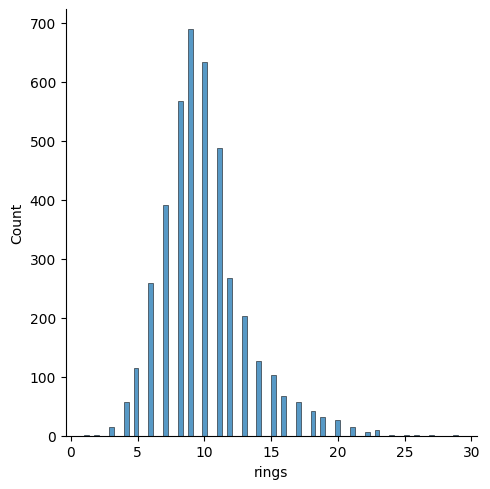

In [45]:
#histogram을 사용하여 label, rings의 분포를 그려봅니다.
sns.displot(df, x="rings")

이번엔 shell weight의 분포의 histogram을 그려봅시다. 그리고 boxplot의 넓이를 binwidth를 통해 조절도 해봅시다

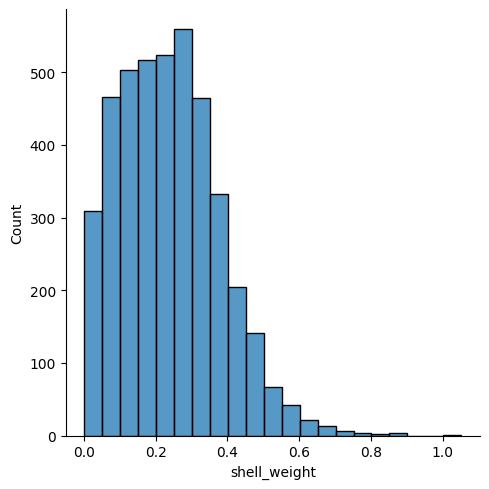

In [46]:
# binwidth를 0.05로 설정했을때
sns.displot(df, x="shell_weight", binwidth=0.05)

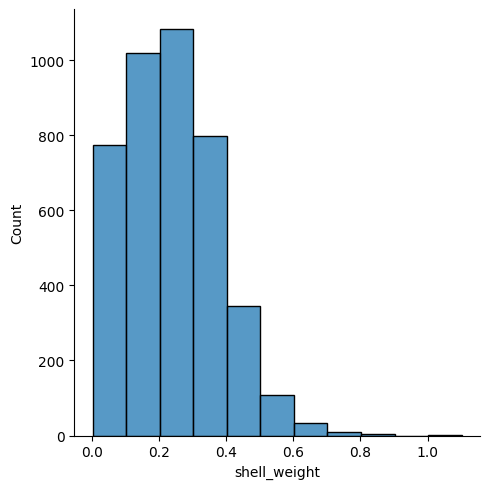

In [47]:
#binwidth를 0.1로 설정했을때
sns.displot(df, x="shell_weight", binwidth=0.1)

viscera_weight의 분포를 histogram으로 그려봅시다. 

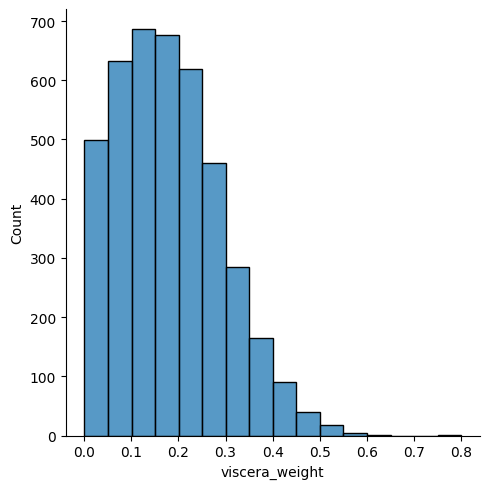

In [48]:
# histogram 2
sns.displot(df, x="viscera_weight", binwidth=0.05)

각 vicera_weight당 gender의 분포를 그려봅시다. 'hue' 파라미터를 gender로 설정하면 각 vicera_weight당 gender의 분포를 알 수 있습니다.

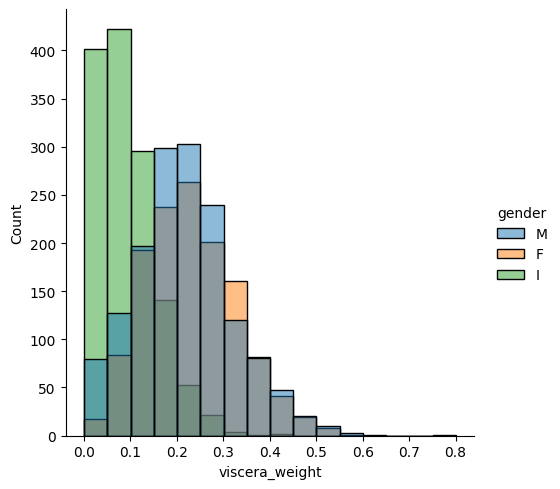

In [49]:
sns.displot(df, x="viscera_weight", binwidth=0.05, hue="gender")

각 gender당 viser_weight을 출력해봅시다.

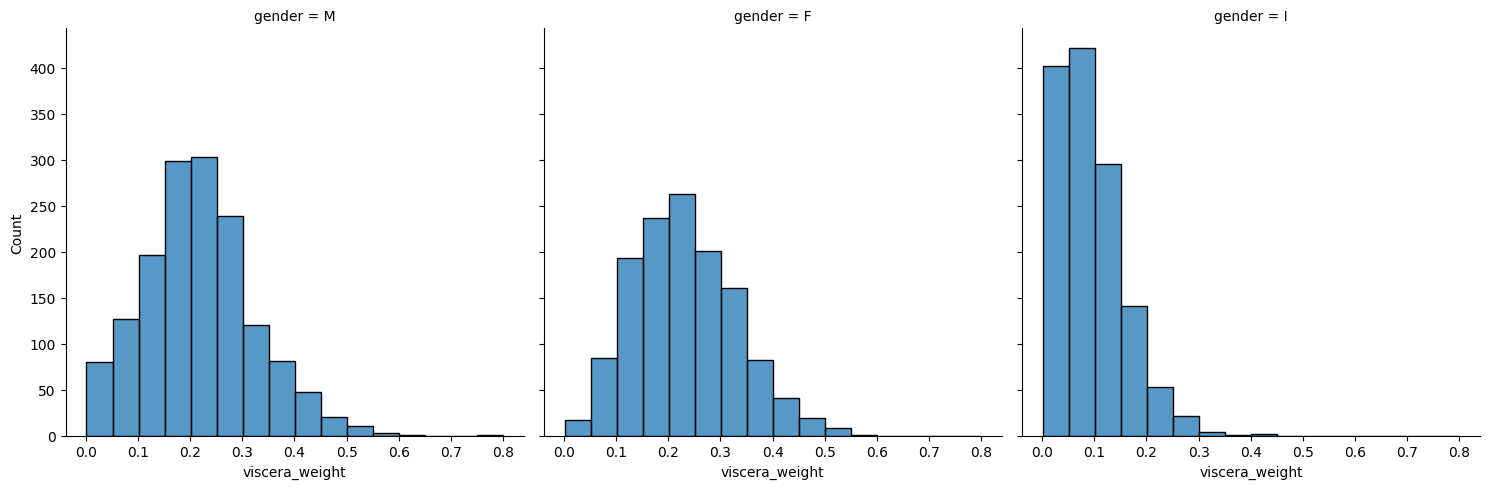

In [50]:
sns.displot(df, x="viscera_weight", binwidth=0.05, col="gender", multiple="dodge")

gender I는 infant로 gender가 정해지지 않았을때입니다. 이때는 viser_weight가 적게 나가다가, gender가 정해지고 나서는 weights가 커진것을 볼 수 있습니다.

이전까지 그려본 histogram은 관측치를 막대그래프(bin)를 이산형(discrete)로 나타냅니다. 이젠 Kernel density estimation(KDE)를 사용할 것인데, KDE는 카우스 커널을 사용해서 그래프를 연속적으로 부드럽게 나타냅니다.

이땐 'kind'를 kde로 설정해주면 됩니다. 마찬가지로 viscera_weight의 분포를 kde로 나타내봅시다.

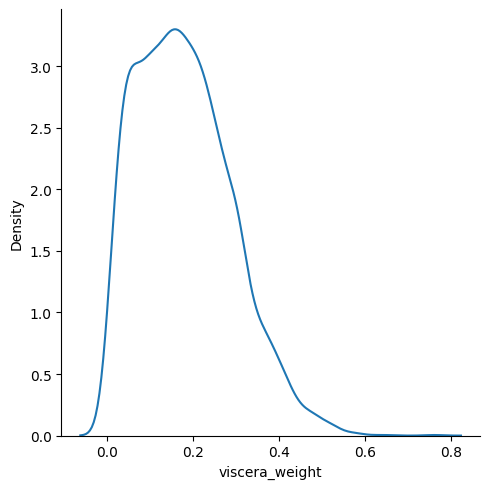

In [51]:
# kernel density 
sns.displot(df, x="viscera_weight", kind="kde")

histogram과 동일하게 'hue' 파라미터를 사용해서 gender에 대한 분포를 그릴 수 있습니다.

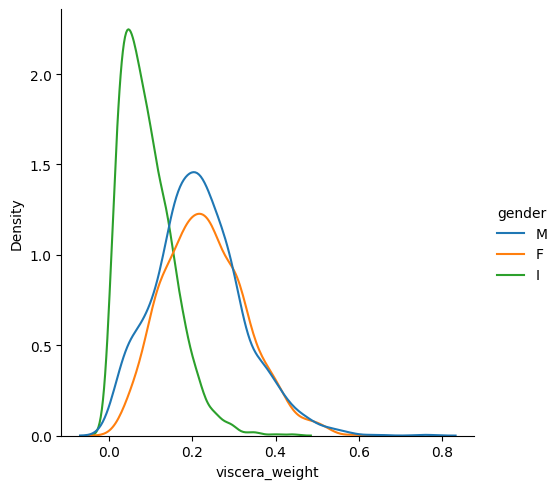

In [52]:
sns.displot(df, x="viscera_weight", hue="gender", kind="kde")

'multiple' 파라미터를 통해서 KDE를 다양하게 그릴 수 있습니다. stack으로 설정해서 그려봅시다

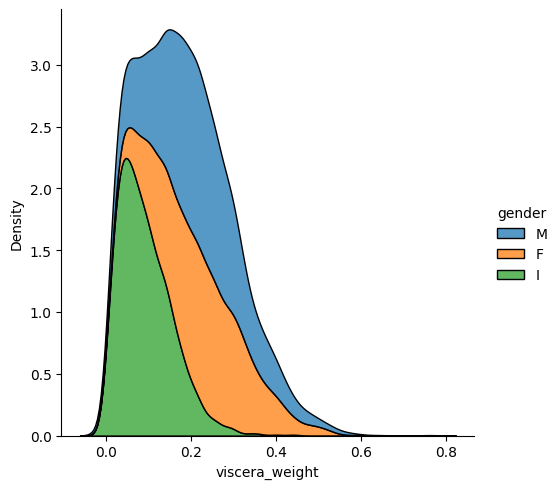

In [53]:
sns.displot(df, x="viscera_weight", hue="gender", kind="kde",multiple='stack')

stacked plot은 데이터를 비교하기엔 힘듭니다. 이때, 'fill'파라미터를 full로 설정해주면 밀도 내부를 opacity를 적용해서 채워줄 수 있습니다.

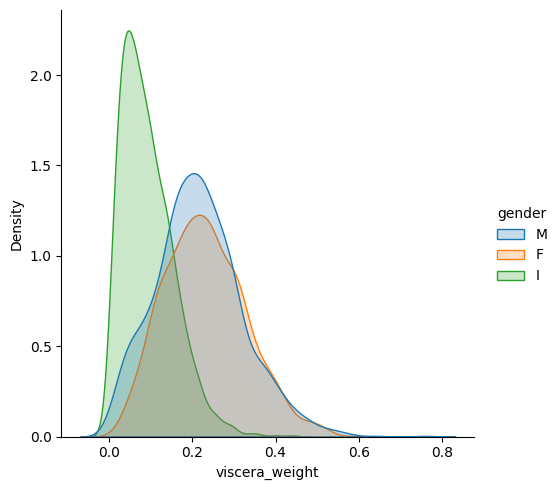

In [54]:
sns.displot(df, x="viscera_weight", hue="gender", kind="kde", fill=True)

이젠 pairplot을 사용하여 데이터에 들어 있는 각 컬럼(열)들의 모든 상관 관계를 출력해봅시다. 

3차원 이상의 데이터라면 pairplot 함수를 사용해 분포도를 그립니다.
pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램과 분포도를 그립니다.

<Figure size 1000x1000 with 0 Axes>

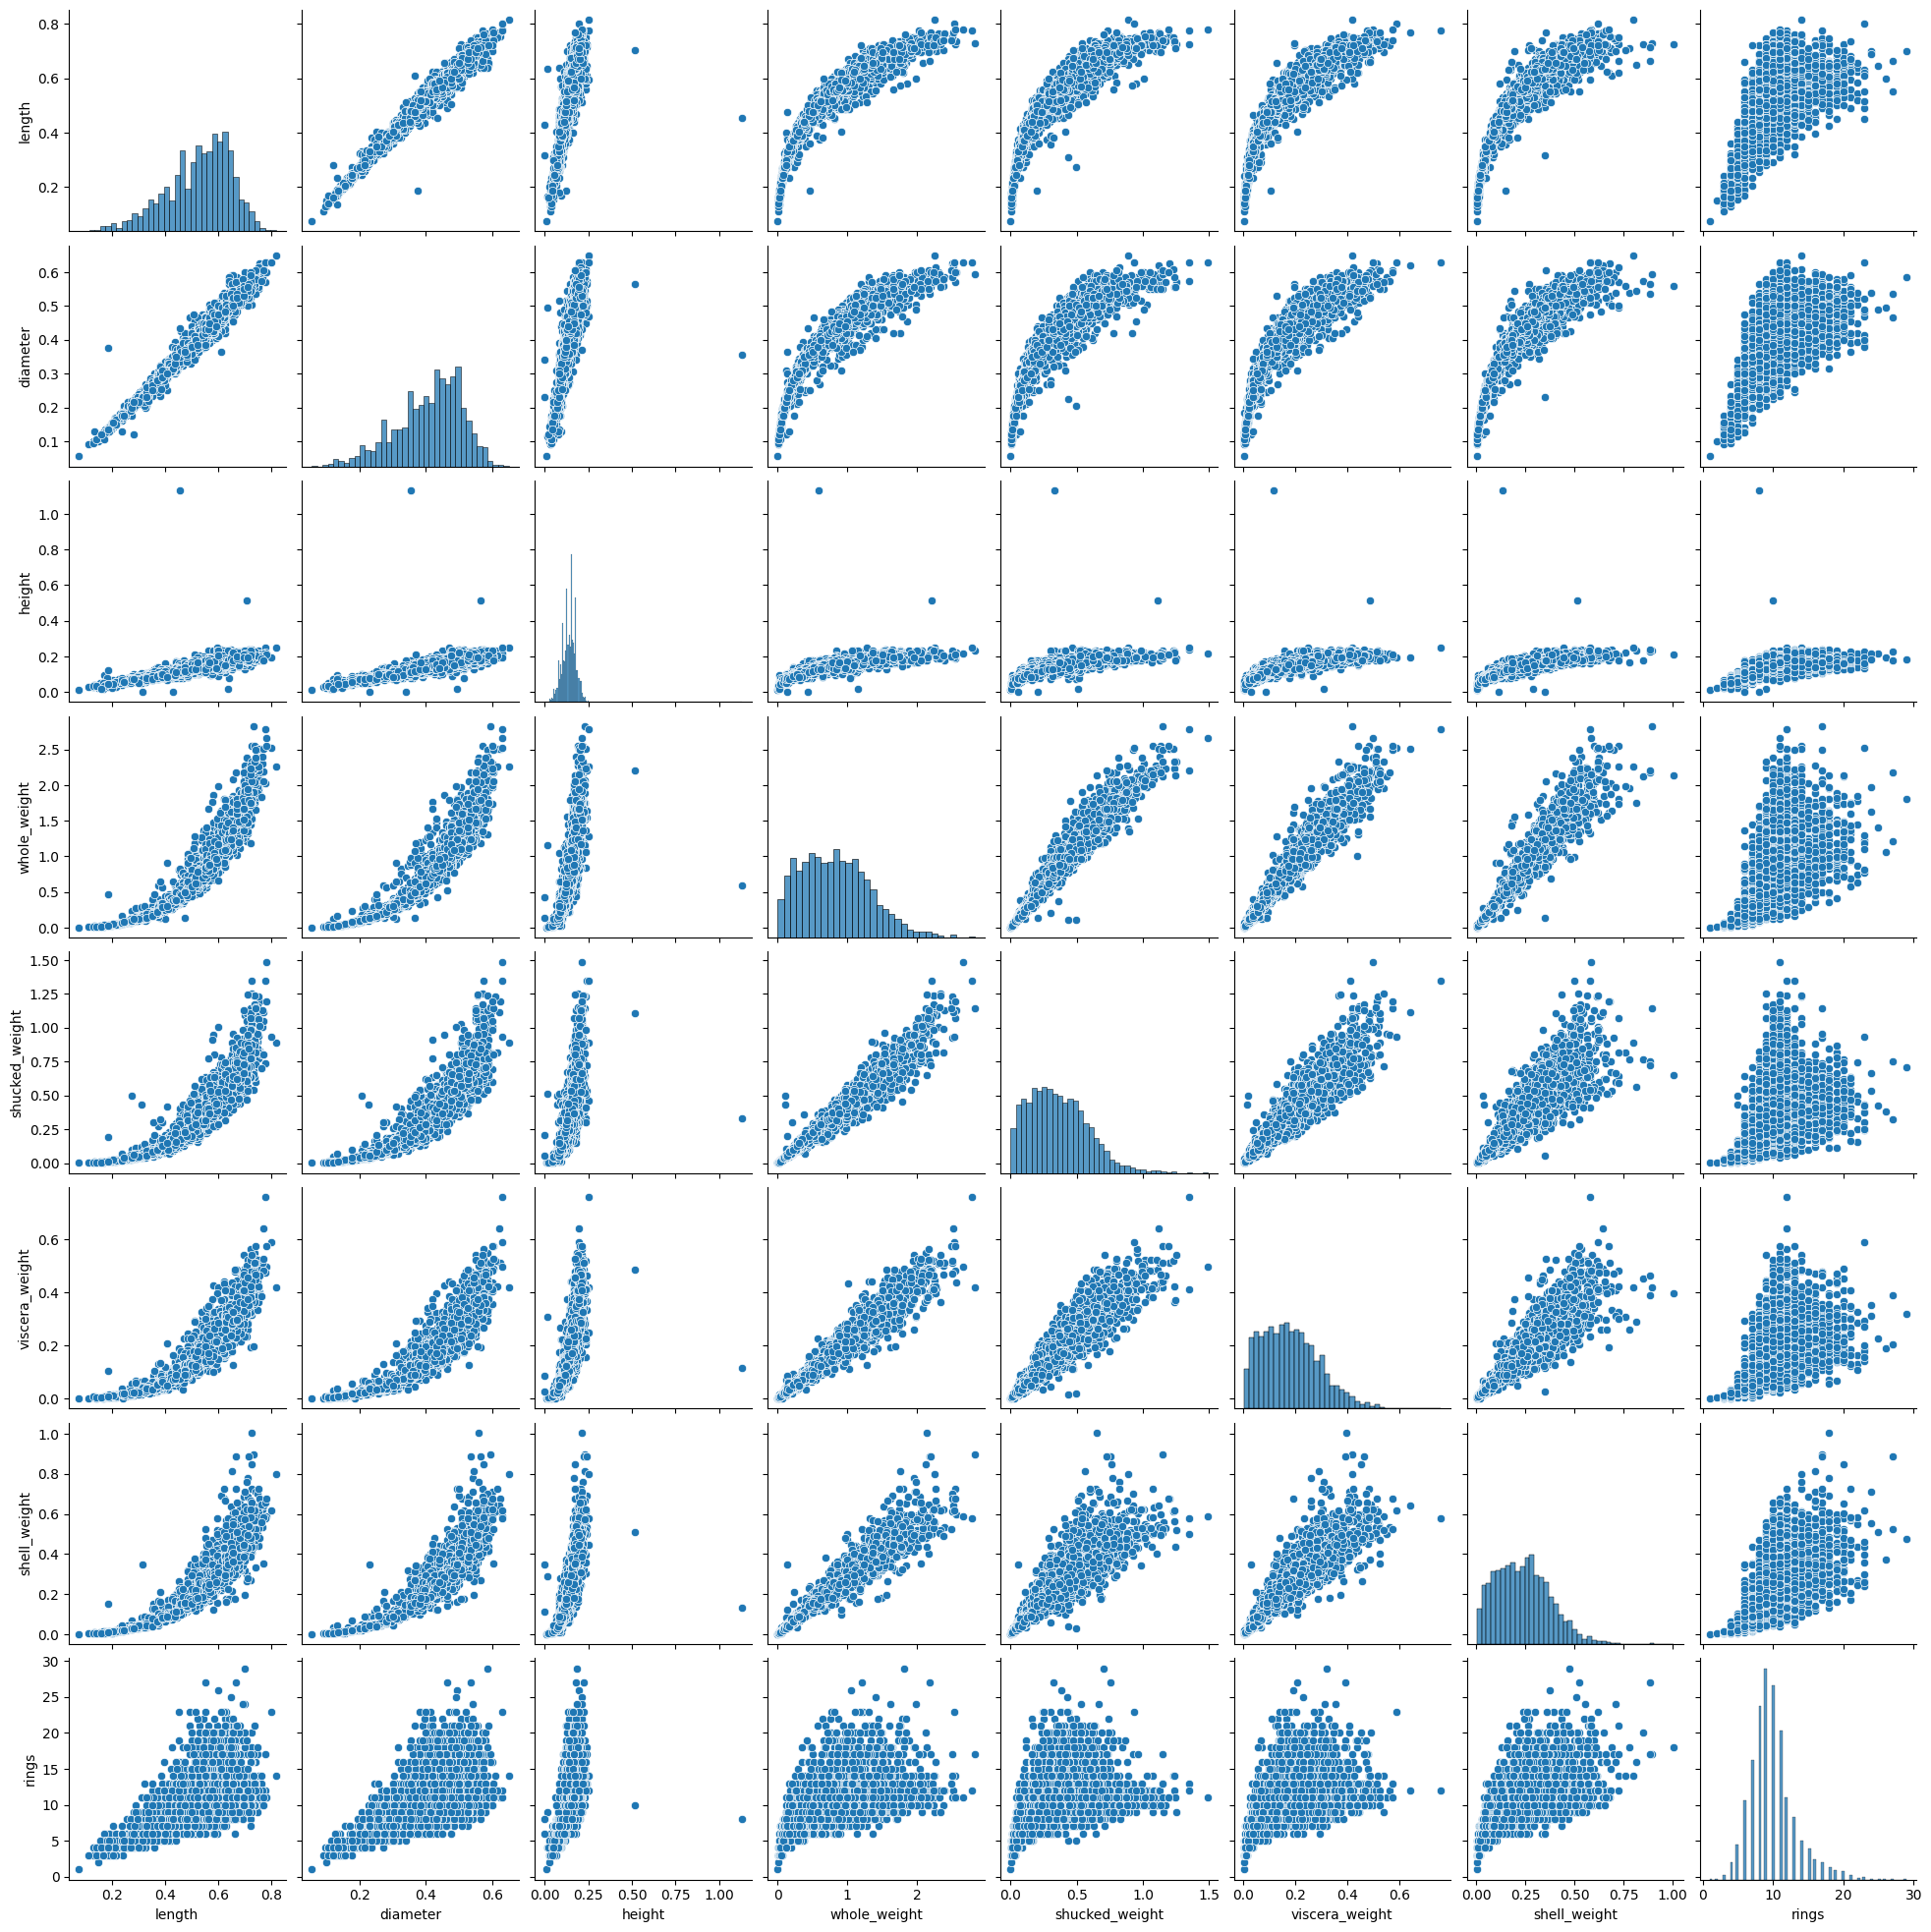

In [55]:
# pair plot
plt.figure(figsize=(10,10))
sns.pairplot(df)

## 3. Data Preprocessing

데이터 전처리는 기존의 데이터를 머신러닝 알고리즘에 알맞은 데이터로 바꾸는 과정입니다. 전처리 과정은 모델이 생선 된 이후에도 예측하고자 하는 새로운 데이터에도 적용하는 과정입니다. 또한, 전처리 과정을 통해서 더욱더 모델 학습의 성능을 높일 수 있습니다.


1. 데이터 결측치 처리
2. 데이터 인코딩
    * Label encoding
    * One-hot encoding


참고: https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

### 3-1. Data cleaning

대부분의 머신러닝 알고리즘은 missing featture, 즉 누락된 데이터가 있을때, 제대로 역할을 하지 못합니다. 그래서 첫번째 전처리로는 missing feature에 대해 처리해주어야합니다. 



In [56]:
#데이터가 null 값이 있는지를 확인해봅니다
#결측값의 개수를 구하는 코드입니다.
df.isnull().sum()

gender            0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

결측값이 없는것을 확인할 수 있습니다. 이제 만약, 결측값이 있다면, drop하는 코드를 짜봅시다.

In [57]:
# null값이 있다면 drop을 합니다.
df = df.dropna()

그리고 결측값이 잘 제거가 되었는지를 isnull.sum으로 다시 확인합니다.

In [58]:
df.isnull().sum()
#애초에 결측값이 없었기때문에 null값은 없는 것을 확인할 수 있습니다.

gender            0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

### 3-2. Data Encoding


머신러닝을 할때 기계가 이해할 수 있도록 모든 데이터를 수치로 변환해주는 것은 매우 중요합니다. 기존 데이터에 문자형이 있는 경우 이를 숫자형 데이터로 인코딩 해주어야합니다. 
데이터 인코딩에는 크게 두가지 종류가 있습니다.

- Label Encoding: 
    - 범주형 변수(categorical variable)의 문자열을 수치형으로 변환해줍니다(알파벳 오더순으로 숫자를 할당해줍니다)
    - 각 범주가 1에서 N의 숫자를 가지게됩니다.
    - 하지만 알파벳 오더 순으로 숫자를 할당되기때문에, 그로 인한 랭크된 숫자정보가 머신러닝 모델에 잘못 반영될 수 있습니다.

  ![](https://d1m75rqqgidzqn.cloudfront.net/wp-data/2020/08/11155757/image-37.png)
  
  <구현 방법>
  - sklearn에서 제공하는 [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) 사용
  
     

- One-Hot encoding: 
    - 각 범주를 0과 1의 벡터로만 표현하는 기법입니다.
    - 즉, feature 값의 유형에 따라 새로운 feature를 추가해 고유 값에 해당하는 컬럼에만 1을 표시하고 나머지 컬럼에는 0을 표시하는 방법입니다.
    - 변수의 순서에 차이가 없는 범주형 변수는 one-hot encoding 을 사용하게됩니다.
    - 범주가 너무 많은 특성의 경우 데이터의 cardinality를 매우 크게 증가시킨다는 단점이 있습니다.
   

  ![](https://i.imgur.com/mtimFxh.png)
  
  
  <구현 방법>
  
  - sklearn에서 제공하는 [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) 
  - pandas에서 제공하는 [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) 


abalon의 데이터의 gender attribute는 M,I,F로 이루어진 순서가 상관이 없는 catogrical value였습니다. 순서가 상관이 없는 변수의 encoding은 one hot encoding을 사용합니다. 
이제 gender을 one-hot encoding을 통해 변환해주도록 합시다.

이때 우리는 pandas에서 제공해주는 get_dummies를 사용하겠습니다.

In [59]:
#onehot_df라는 새로운 데이터프레임을 만들어서, get_dummies를 사용하여 prefix='gender'로 설정하여 one hot encoding을 실행해봅시다.
onehot_df = pd.get_dummies(df.gender, prefix="gender")
#변환이 되었는지 확인해봅시다
onehot_df.head()

,gender_F,gender_I,gender_M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


각 row별로 one hot encoding이 실행된 것을 볼 수 있습니다. 이제 우리의 original 데이터프레임 df에 병합시키고, 기존의 gender column은 drop하도록 해봅시다.
original 데이터프레임에 onehot_df를 병합시키는 것은 pandas의 concat을 사용합니다.
그리고 drop의 경우 drop()을 사용하게 됩니다

In [60]:
# 데이터 병합
df = pd.concat([onehot_df, df], axis=1).drop(["gender"], axis=1)
df.head()

,gender_F,gender_I,gender_M,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


gender_F,gender_I,gender_M의 새로운 feature가 생겨서 gender를 one hot encoding을 진행한 것을 볼 수 있습니다.

이제 decision tree classifier모델을 훈련하기에 앞서서 label을 catorical value로 바꿔줍시다. 

### 3-3. Data discretization for classification

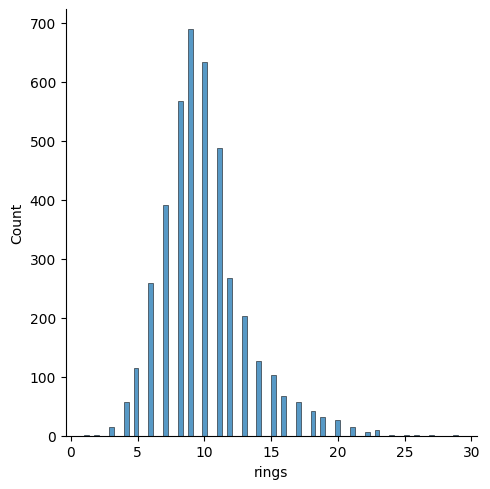

In [61]:
# plot label distribution
# label의 분포도를 그려봅시다.
sns.displot(df, x="rings")

본 실습에서는 decision tree classifier model을 학습할 것이기 때문에 classification을 위하여 데이터 분포에서 가장 높은 9를 기준으로 나눠서 나누어서 0과 1로 라벨링 할 것입니다. 이를 discretize labeling이라고 부릅니다. 

이는 pandas의 cut을 사용하게 됩니다. bins 변수에는 [0,9,30] 이 들어가게 되는데, rings의 데이터가 0부터 30까지의 숫자로 이루어져있고, 그 중 가장 많았던 label인 9를 기준으로 0과 1로 나눠주기 위함입니다. labels변수에는 [0,1]로 설정하므로써 0과 1로 label을 바꿔줍니다.

In [62]:
# discretize label
disc_label = pd.cut(df.rings, bins=[0, 9, 30], labels=[0, 1])

앞쪽 10개의 값을 확인해보도록 하겠습니다.

In [63]:
# 결과 확인
disc_label[:10]

0    1
1    0
2    0
3    1
4    0
5    0
6    1
7    1
8    0
9    1
Name: rings, dtype: category
Categories (2, int64): [0 < 1]

0 또는 1로 변환된 것을 확인할 수 있습니다.

원래 rings의 값들은 어땟을까요? 제대로 변환이 되었는지 각 row별로 비교해봅시다

In [64]:
# 결과 확인
df.rings[:10]

0    15
1     7
2     9
3    10
4     7
5     8
6    20
7    16
8     9
9    19
Name: rings, dtype: int64

row 0의 original값은 15(9보다 큰 숫자)로, 1로 변환된 것을 확인 할 수 있습니다. 또,  row 1의 original값은 7로 9보다 작은 숫자이므로 0으로 변환된 것을 확인할 수 있습니다.

이제 변환된 label값을 original 데이터프레임에 병합해봅시다. 아까 gender때 사용했던 concat을 그대로 사용하게 됩니다. 

먼저, rings를 drop시키고 df와 disc_label을 concat시키게 됩니다. 여기서 disc_label은 pandas의 series데이터 형으로 to_frame()을 사용하여 데이터 프레임으로 변환시켜주게 됩니다. 

In [65]:
# 변환이 안된 rings column을 drop
df = df.drop(["rings"], axis=1)
#original df와 disc_label과 병합
df = pd.concat([df, disc_label.to_frame()], axis=1)
#잘 적용이 되었는지 확인해봅시다
df.head()

,gender_F,gender_I,gender_M,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


## 4. Split Data

머신러닝 모델을 훈련하기에 앞서 데이터를 train과 test 데이터셋으로 분리하는 과정입니다. 

![](https://www.machinecurve.com/wp-content/uploads/2020/11/feed-3.jpg)

이때, 우리는 train 데이터셋을 가지고 모델을 훈련시키고, train 데이터셋에서 파생된 validation 데이터를 가지고 모델을 evaluate하게 됩니다. validation데이터셋에서 최고로 잘 작동하는 모델을 test 데이터셋으로 최종 평가하게됩니다.


documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

train과 test데이터로 split하기전, label데이터와 feature데이터를 분리해줍니다. label데이터는 우리가 예측해야하는 값, y가 될것이고, feature 데이터들은 우리가 예측에 활용하게되는 변수들로 x가 됩니다.

In [66]:
# split data to X and y
y = df[["rings"]]   #label
X = df.drop(["rings"], axis=1)

In [67]:
# x가 label을 제거한 feature들로 잘 나뉘게 되었는지 체크해봅시다
X.columns

Index(['gender_F', 'gender_I', 'gender_M', 'length', 'diameter', 'height',
       'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight'],
      dtype='object')

이제 train과 test데이터셋을 sklearn라이브러리에서 제공해주는 train_test_split으로 나눠주게 됩니다.

하지만 우리는 validation 데이터셋을 train 데이터셋에서 분리할 것이기 때문에 두번 실시하게 됩니다.
한번은 train과 test split, 다른 한번은 train을 train과 validation으로 split.

이때 train과 test 데이터셋은 80:20의 비율로 나누고, train과 validation 데이터셋은 75:25로 나누게 됩니다.

이는 test_size변수를 지정해주면 되는데 test데이터셋의 비율인 20%, 0.2로 설정해주면 됩니다.

In [68]:
# split train, validation and test data
from sklearn.model_selection import train_test_split

#train과 test split 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train을 train과 validation으로 split 75:25
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.8 * 0.25 = 0.2

데이터셋을 모두 split한 후 dimension을 check해봅시다

In [69]:
# check dimension
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(2505, 10)
(836, 10)
(836, 10)


train 데이터는 2505개의 row, validation데이터는 836, test또한 836으로 나뉜것을 알 수 있습니다.

이제 decision tree classifier를 나눈 데이터셋을 이용하여 훈련시켜 볼까요?

## 5. Build and Train Model

본 실습에서는 sklearn에서 제공해주는 decision tree classifier을 사용하여 train시켜보고, evaluation을 해보도록 하겠습니다. 

Decision Tree: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [70]:
# build and train decision tree
from sklearn.tree import DecisionTreeClassifier

#decision tree classifier을 train data를 가지고 훈련시켜봅시다.
decTree = DecisionTreeClassifier()
decTree.fit(X_train, y_train)

DecisionTreeClassifier()

validation 데이터를 가지고 훈련시킨 decTree의 accuracy를 출력해봅시다.

In [71]:
# get validation accuracy
decTree.score(X_val, y_val)

0.7069377990430622

전체 트리를 살펴보는 것은 어려울 수 있으니, 대신 트리가 어떻게 작동하는지 요약하는 속성들을 사용할 수 있습니다. 가장 널리 사용되는 속성은 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도feature importance입니다. 이 값은 0과 1 사이의 숫자로, 각 특성에 대해 0은 전혀 사용되지 않았다는 뜻이고 1은 완벽하게 타깃 클래스를 예측했다는 뜻입니다. 특성 중요도의 전체 합은 1입니다.

/var/folders/hm/bfsx_0_d0d53_0mr4q0q1dcr0000gn/T/ipykernel_6396/1428359337.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data.columns[sorted_idx])


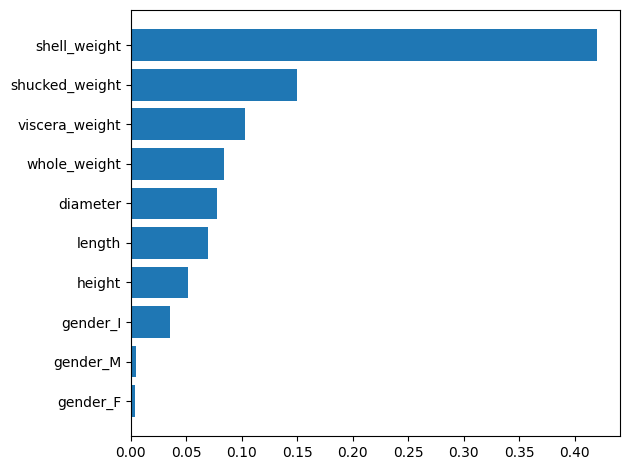

In [72]:
# plot feature importance
def plot_imp(clf, data):
    sorted_idx = clf.feature_importances_.argsort()
    y_ticks = np.arange(0, len(data.columns))
    fig, ax = plt.subplots()
    ax.barh(y_ticks, clf.feature_importances_[sorted_idx])
    ax.set_yticklabels(data.columns[sorted_idx])
    ax.set_yticks(y_ticks)
    fig.tight_layout()
    plt.show()

plot_imp(decTree, X_train)

shell weight가 가장 중요한 특성으로 나타납니다.

그러나 어떤 특성의 feature_importance_ 값이 낮다고 해서 이 특성이 유용하지 않다는 뜻은 아닙니다. 단지 트리가 그 특성을 선택하지 않았을 뿐이며 다른 특성이 동일한 정보를 지니고 있어서일 수 있습니다.

이제 위에서 훈련시킨 decision tree를 시각화 해봅시다.

In [73]:
from sklearn.tree import export_graphviz
export_graphviz(decTree, out_file='tree.dot', feature_names =X_train.columns,
                filled = True)
!dot -Tpng tree.dot -o tree.png 

from IPython.display import Image
Image(filename = 'tree.png')

zsh:1: command not found: dot


FileNotFoundError: [Errno 2] No such file or directory: 'tree.png'

## 6. Pruning

Decision Tree: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

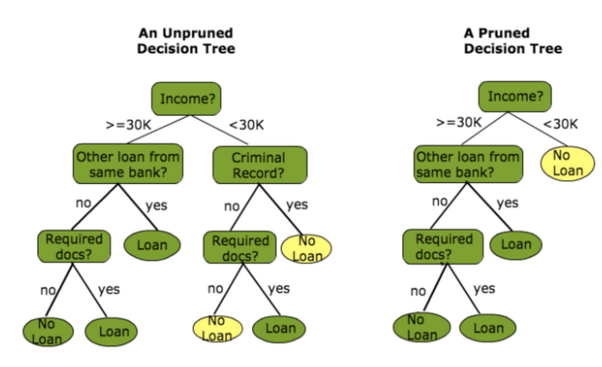

가지치기란 최대트리로 형성된 결정트리의 특정 노드 밑의 하부 트리를 제거하여 일반화 성능을 높히는 것을 의미합니다. 모든 끝노드의 불순도가 0인 트리를 full tree라고 하는데, 이 경우에는 분할이 너무 많이 과적합의 위험이 발생합니다. 과적합은 학습 데이터에 과하게 학습하여 실제 데이터에 오차가 증가하는 현상입니다. 이를 방지하기 위해서 적절한 수준에서 끝노드를 결합해주는 기법을 가지치기(pruning)이라고 합니다. 

sklearn에서는 max_leaf_nodes변수를 설정해주면 알아서 pruning을 해줍니다.

한번 해볼까요?

In [74]:
decTree_p = DecisionTreeClassifier(max_leaf_nodes=10)
decTree_p.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

validation 데이터를 가지고 pruning된 tree의 accuracy를 출력해봅시다.

In [75]:
# check accuracy
decTree_p.score(X_val, y_val)

0.7619617224880383

이제 pruned된 tree를 시각화 해봅시다

In [76]:
export_graphviz(decTree_p, out_file='tree_pruned.dot', feature_names =X_train.columns,
                filled = True)
!dot -Tpng tree_pruned.dot -o tree_pruned.png 

zsh:1: command not found: dot


In [77]:
from IPython.display import Image
Image(filename = 'tree_pruned.png')

FileNotFoundError: [Errno 2] No such file or directory: 'tree_pruned.png'

## 7. Model Evaluation

### 7-1. Confusion Matrix

  - confusion_matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix
  - plot_confusion_matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix
  
  
- True Positive(TP): True인데 True라고 맞춘 경우(o, 맞춤)
- False Positive(FP): False인데 True라고 한 경우(x, 틀림)
- True Negative(TN): False인데 False라고 맞춘 경우(o, 맞춤)
- False Negative(FN): True인데 False라고 한 경우(x, 틀림)

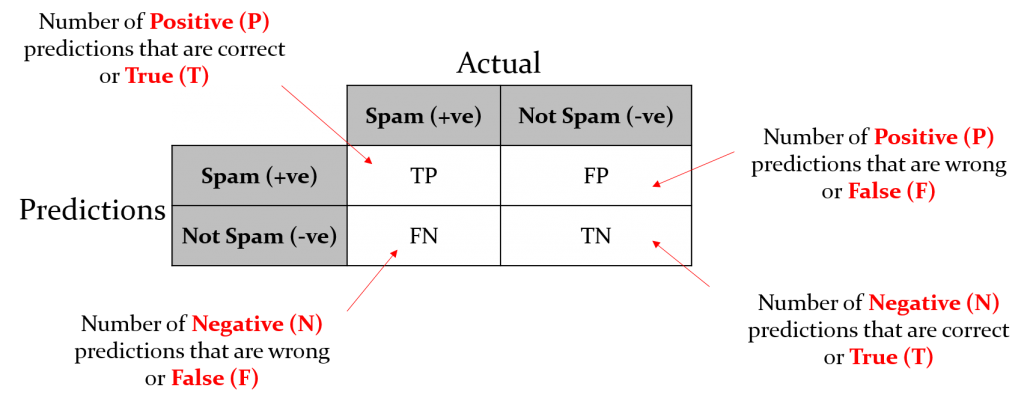

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


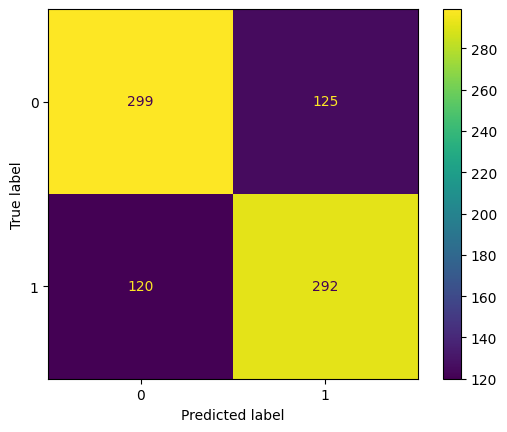

In [78]:
# plot confusion matrix - not normalized
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(decTree, X_val, y_val, normalize=None, values_format='d')

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


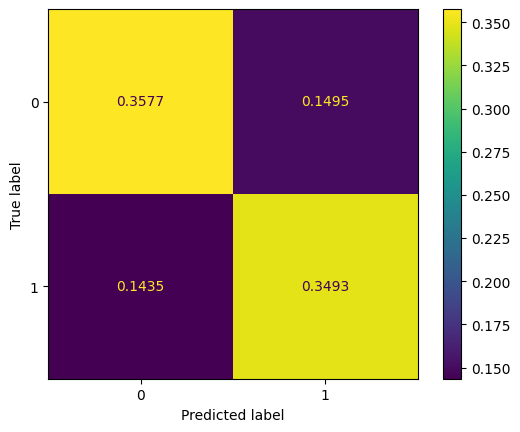

In [79]:
# plot confusion matrix - normalized (value_format을 소숫점 4자리까지 )
plot_confusion_matrix(decTree, X_val, y_val, normalize='all', values_format='.4f')

### 7-2. Classification report

sklearn에서는 classification_report를 제공해주는데, 이는 평가지표들을 한번에 볼 수 있도록 합니다. 

documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [80]:
# print classification report
from sklearn.metrics import classification_report

y_pred = decTree.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       424
           1       0.70      0.71      0.70       412

    accuracy                           0.71       836
   macro avg       0.71      0.71      0.71       836
weighted avg       0.71      0.71      0.71       836



### 7-3. AUROC score

ROC Curve는 여러 임계값에서 분류기의 특성을 분석하는데 널리 사용하는 도구입니다. Precision-Recall curve와 비슷하게 ROC curve는 분류기의 모든 임계값을 고려하지만, 정밀도와 재현률 대신 True Positive Rate(TPR)에 대한 False Positive Rate(FPR)을 나타냅니다. True Positive Rate은 Recall의 다른 이름이여, False Positive Rate은 전체 음성 샘플 중에서 거짓 양성으로 잘못 분류한 비율입니다. ROC curve는 roc_curve 함수를 사용하여 만들 수 있습니다. ROC curve는 왼쪽 위에 가까울 수록 이상적입니다. False Positive Rate이 낮게 유지되면서 recall이 높은 분류기가 좋은 것 입니다.

roc_auc_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

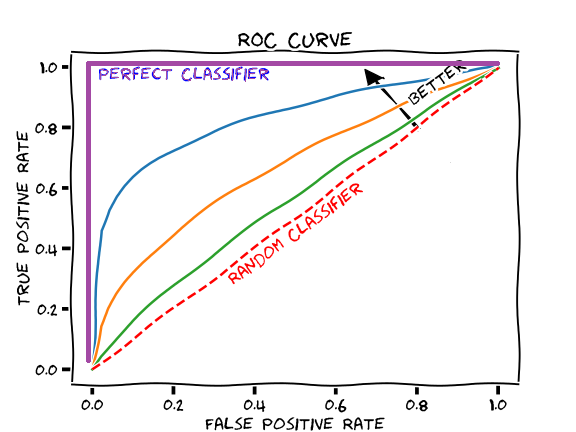

In [81]:
# print auroc score
from sklearn.metrics import roc_auc_score

roc_auc_score(y_val, y_pred)

0.7069632716614765

### 7-4. Compare Validation accuracy

pruned decision tree vs decision tree

In [82]:
# print accuracy
print(decTree.score(X_val, y_val))
print(decTree_p.score(X_val, y_val))

0.7069377990430622
0.7619617224880383


In [83]:
# print auroc score
y_pred = decTree.predict_proba(X_val)[:, 1]
y_pred_p = decTree_p.predict_proba(X_val)[:, 1]
print(roc_auc_score(y_val, y_pred))
print(roc_auc_score(y_val, y_pred_p))

0.7069632716614765
0.8329078127862246


### 7-5. Final evaluation on test dataset

In [84]:
# print classification report
y_pred_test = decTree_p.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78       421
           1       0.76      0.83      0.79       415

    accuracy                           0.78       836
   macro avg       0.79      0.78      0.78       836
weighted avg       0.79      0.78      0.78       836



In [85]:
# print auroc score
y_pred_test = decTree_p.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred_test)

0.8410067824743154

# 실습 과제(총 10점)

Scikit-learn Decision Tree Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

1. 위의 Decision tree documentation을 참고하여 총 4개의 새로운 결정트리 모델을 생성하여 train 데이터에 훈련시켜봅시다. 이 때 각각의 결정트리 모델은 `max_leaf_nodes`, `max_depth`, `min_sample_split`, `min_sample_leaf`의 네개의 pruning 파라미터 중 하나씩을 임의로 조정해주어야 합니다.(하나의 결정 트리는 하나의 pruning 파라미터만 조정하면 되고, 각각의 결정트리는 서로 다른 파라미터를 조정해야합니다.) (4점)

2. pruning 파라미터를 조정한 4개의 결정트리에 대해 validation dataset에 대한 분류 정확도(classification report, auroc score)를 확인해보고, pruning 파라미터를 조정하지 않았던 결정트리의 분류 정확도와 비교하여 그 차이를 서술합니다. (4점)

3. validation 데이터을 통해 가장 좋은 모델을 선정하고, test 데이터에 그 모델의 성능(classification report, auroc score)을 평가하여 최종 모델 성능을 서술합니다. (2점)

In [118]:
decTree_p1 = DecisionTreeClassifier(max_leaf_nodes=20)
decTree_p1.fit(X_train, y_train)
y_pred_p1 = decTree_p1.predict_proba(X_val)[:,1]

decTree_p2 = DecisionTreeClassifier(max_depth=4)
decTree_p2.fit(X_train, y_train)
y_pred_p2 = decTree_p2.predict_proba(X_val)[:,1]

decTree_p3 = DecisionTreeClassifier(min_samples_split=25)
decTree_p3.fit(X_train, y_train)
y_pred_p3 = decTree_p3.predict_proba(X_val)[:,1]

decTree_p4 = DecisionTreeClassifier(min_samples_leaf=5)
decTree_p4.fit(X_train, y_train)
y_pred_p4 = decTree_p4.predict_proba(X_val)[:,1]

In [119]:
print("==========================Original")
print(decTree.score(X_val, y_val))
print(roc_auc_score(y_val, y_pred))

print("==========================max_leaf_nodes=10")
print(decTree_p.score(X_val, y_val))
print(roc_auc_score(y_val, y_pred_p))

print("==========================max_leaf_nodes=20")
print(decTree_p1.score(X_val, y_val))
print(roc_auc_score(y_val, y_pred_p1))

print("==========================max_depth=4")
print(decTree_p2.score(X_val, y_val))
print(roc_auc_score(y_val, y_pred_p2))

print("==========================min_samples_split=25")
print(decTree_p3.score(X_val, y_val))
print(roc_auc_score(y_val, y_pred_p3))

print("==========================min_samples_leaf=5")
print(decTree_p4.score(X_val, y_val))
print(roc_auc_score(y_val, y_pred_p4))

==========================Original
0.7069377990430622
0.7069632716614765
==========================max_leaf_nodes=10
0.7619617224880383
0.8329078127862246
==========================max_leaf_nodes=20
0.7523923444976076
0.8331282057153324
==========================max_depth=4
0.7607655502392344
0.8427339027294375
==========================min_samples_split=25
0.7476076555023924
0.8032950174024547
==========================min_samples_leaf=5
0.7523923444976076
0.819730032973072


# 비교

기본적으로 Defalut 값 보다 param 을 올릴때 Original 보다 성능이 좋아진다.
하지만 특정 수치 이상 올리면 오히려 성능이 낮아진다.

1. max_leaf_nodes 는 10 에서 가장 좋은 성능을 보인다.
2. max_depth 는 5 에서 가장 좋은 성능을 보인다.
3. min_samples_split 는 25 에서 가장 좋은 성능을 보인다
4. min_samples_leaf 는 10 에서 가장 좋은 성능을 보인다

In [131]:
decTree_pf = DecisionTreeClassifier(max_leaf_nodes=10, max_depth=4,min_samples_split=25)
decTree_pf.fit(X_train, y_train)
y_pred_pf = decTree_pf.predict_proba(X_val)[:,1]
print("==========================Final")
print(decTree_pf.score(X_val, y_val))
print(roc_auc_score(y_val, y_pred_pf))

==========================Final
0.7607655502392344
0.8413714737131343


# Final

위의 param을 모두 적용한 Final 모델
기존 non-pruning 모델보다 9퍼센트 향상된 성능을 보인다.
min_sample_leaf 는 최종 모델에 아무런 영향을 주지 못한다.